In [1]:
import pandas as pd
import numpy as np
from scipy.fftpack import fft
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Define paths
base_path = '/Users/priyank/Desktop/ML4QS-project/Combined 80mins/Combined_80min_data/'
files = [
    'Combined_accelerometer_80min.csv',
    'Combined_gyroscope_80min.csv',
    'Combined_linear_accelerometer_80min.csv',
    'Combined_magnetometer_80min.csv'
]

In [3]:
# Load and combine the datasets
dataframes = []
sensor_types = ['accelerometer', 'gyroscope', 'linear_accelerometer', 'magnetometer']
sensor_columns = {}
for file, sensor in zip(files, sensor_types):
    df = pd.read_csv(base_path + file)
    sensor_columns[sensor] = [f'{sensor}_{col}' for col in df.columns if col not in ['time', 'label']]
    df = df.rename(columns={col: f'{sensor}_{col}' for col in df.columns if col not in ['time', 'label']})
    dataframes.append(df)

combined_data = pd.concat(dataframes, axis=1)
print("Data successfully loaded and combined.")

# Remove duplicate 'label' columns keeping only the first occurrence
combined_data = combined_data.loc[:, ~combined_data.columns.duplicated()]

# Print first few rows of the combined data
print(combined_data.head())

Data successfully loaded and combined.
   time  accelerometer_X (m/s^2)  accelerometer_Y (m/s^2)  \
0   0.0                 9.986539                -0.004582   
1   0.5                 5.105301                -0.415617   
2   1.0                 8.871006                -2.852091   
3   1.5                 8.871006                -5.486469   
4   2.0                 9.990088                -5.486469   

   accelerometer_Z (m/s^2)      label  gyroscope_X (rad/s)  \
0                 0.850397  handshake            -0.351920   
1                 0.850397  handshake             0.100001   
2                 0.976863  handshake             0.392478   
3                 1.202958  handshake             0.049560   
4                 1.151986  handshake             0.057486   

   gyroscope_Y (rad/s)  gyroscope_Z (rad/s)  linear_accelerometer_X (m/s^2)  \
0            -0.527611             0.563546                        0.985623   
1            -0.372286            -0.199083                    

In [4]:
# Assuming the target column is named 'label' and is present in all files
target = 'label'

# Define feature columns (excluding time and target columns)
feature_columns = combined_data.columns.difference(['time', target])

# Ensure there are no NaN values
combined_data.dropna(inplace=True)

# Split the data into features and target
X = combined_data[feature_columns]
y = combined_data[target]


Accuracy: 0.9648


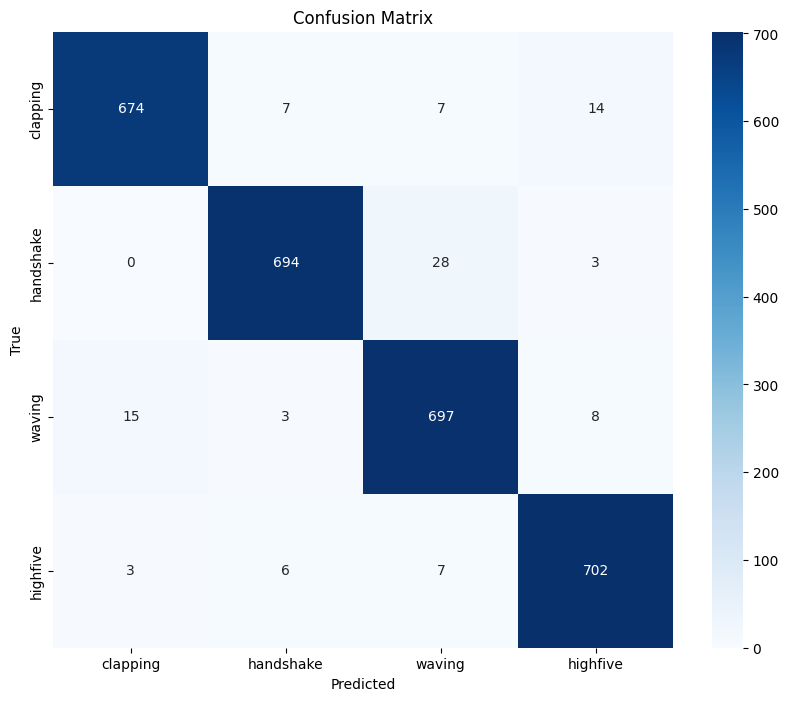

Classification Report:
              precision    recall  f1-score   support

    clapping       0.97      0.96      0.97       702
   handshake       0.98      0.96      0.97       725
    highfive       0.94      0.96      0.95       723
      waving       0.97      0.98      0.97       718

    accuracy                           0.96      2868
   macro avg       0.97      0.96      0.96      2868
weighted avg       0.97      0.96      0.96      2868



In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
# Plot the confusion matrix with nicer formatting
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(class_report)

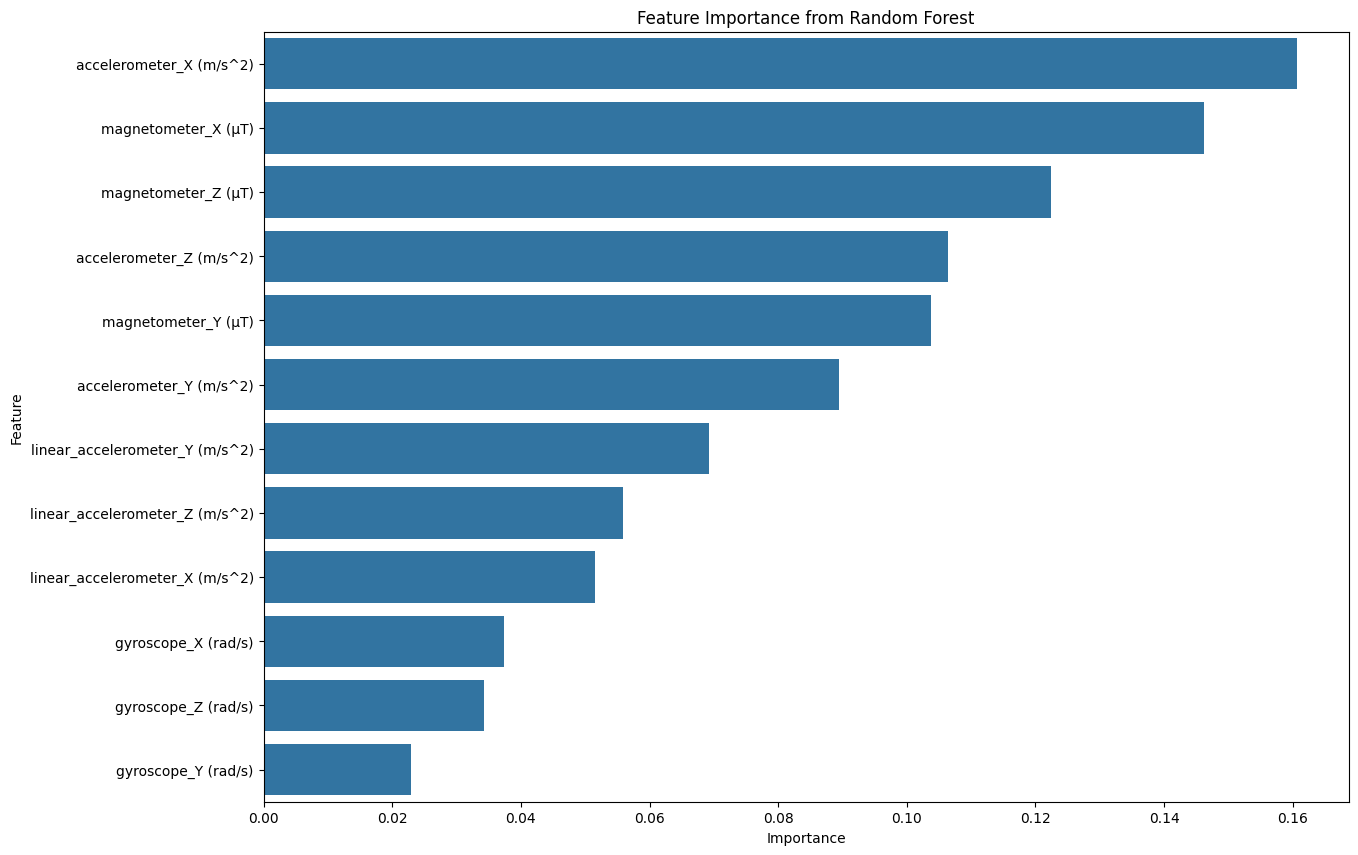

In [6]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Correctly map the feature names to the features used in the model
feature_names = feature_columns.tolist()

# Debugging information
# print(f"Number of features in the combined data: {len(feature_columns)}")
# print(f"Generated feature names: {len(feature_names)}")
# print(f"Number of feature importances: {len(feature_importances)}")
# print(f"Feature names: {feature_names}")
# print(f"Feature columns: {list(feature_columns)}")

# Ensure feature_names matches the actual features used in the model
assert len(feature_names) == len(feature_importances), "Mismatch between feature names and importances lengths."

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# With Feature Engineering

Accuracy: 0.9874


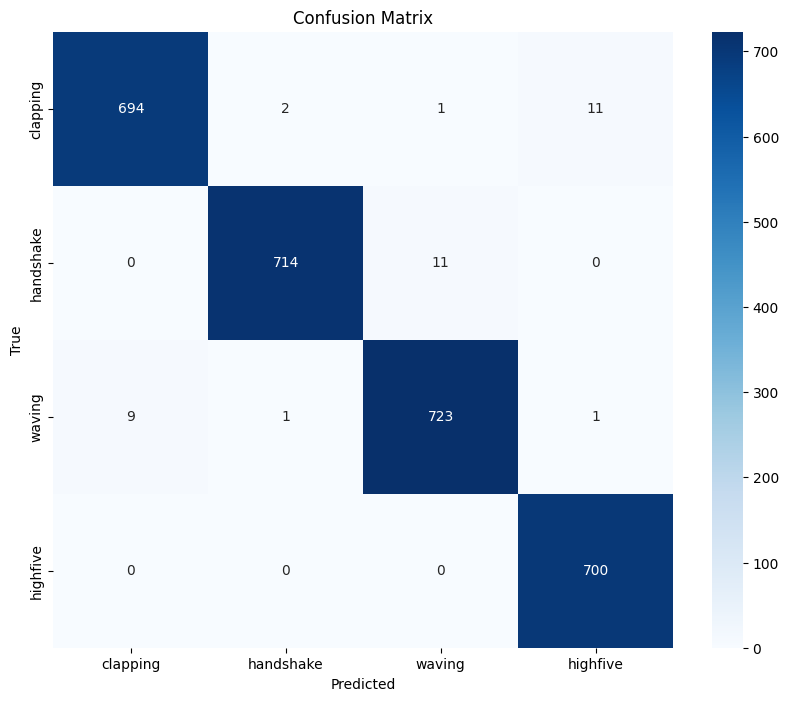

Classification Report:
              precision    recall  f1-score   support

    clapping       0.99      0.98      0.98       708
   handshake       1.00      0.98      0.99       725
    highfive       0.98      0.99      0.98       734
      waving       0.98      1.00      0.99       700

    accuracy                           0.99      2867
   macro avg       0.99      0.99      0.99      2867
weighted avg       0.99      0.99      0.99      2867

Cross-validation scores: [0.82479079 0.99424385 0.96650968 0.87755102 0.99738357]
Mean cross-validation score: 0.9321
Number of features in the combined data: 60
Generated feature names: 60
Number of feature importances: 60


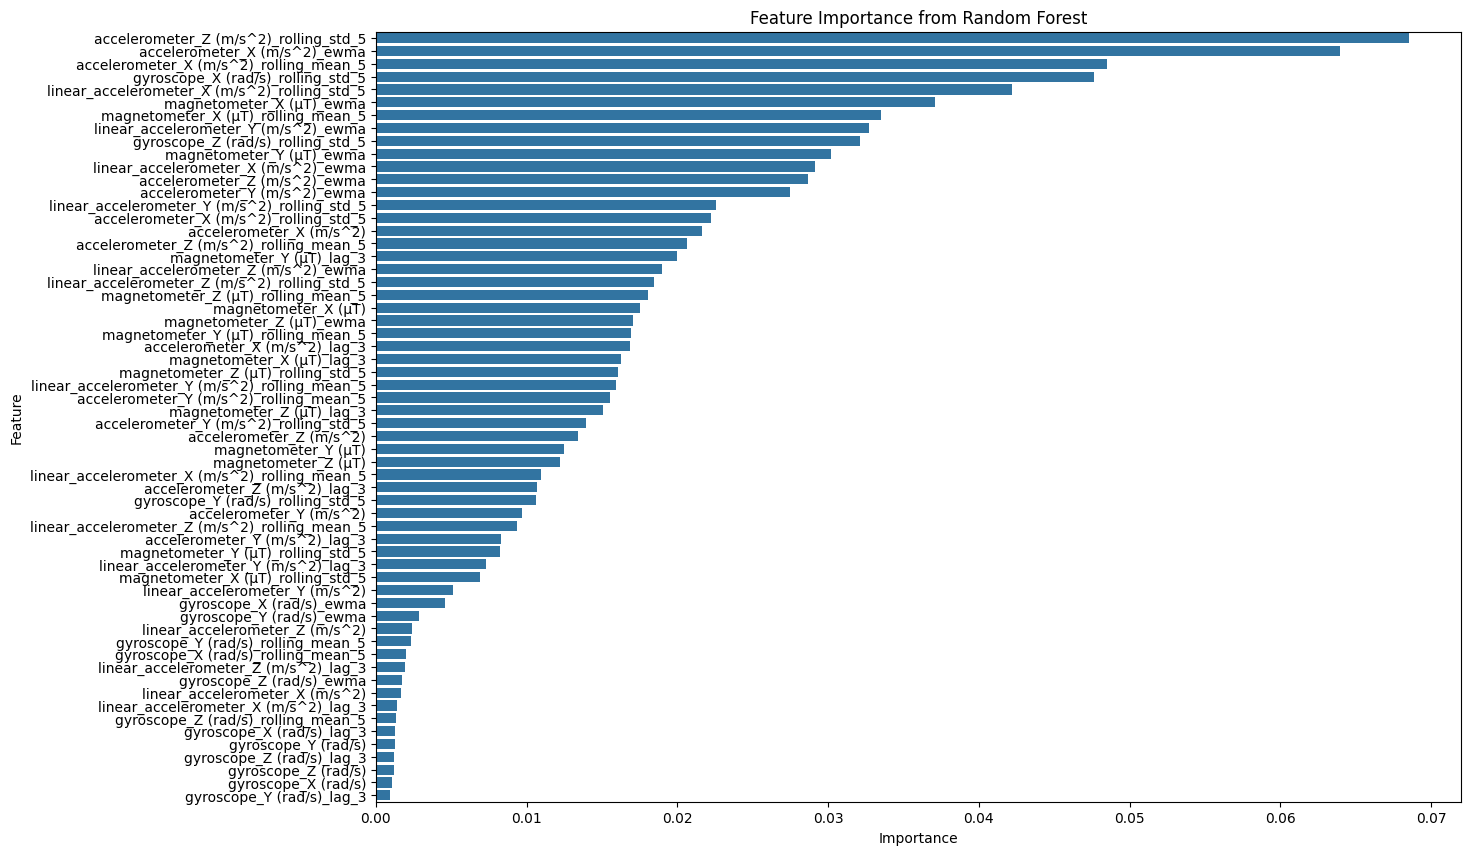

In [7]:
# # Define paths
# base_path = '/Users/priyank/Desktop/ML4QS-project/Combined 80mins/Combined_80min_data/'
# files = [
#     'Combined_accelerometer_80min.csv',
#     'Combined_gyroscope_80min.csv',
#     'Combined_linear_accelerometer_80min.csv',
#     'Combined_magnetometer_80min.csv'
# ]

# # Load and combine the datasets
# dataframes = []
# sensor_types = ['accelerometer', 'gyroscope', 'linear_accelerometer', 'magnetometer']
# sensor_columns = {}
# for file, sensor in zip(files, sensor_types):
#     df = pd.read_csv(base_path + file)
#     sensor_columns[sensor] = [f'{sensor}_{col}' for col in df.columns if col not in ['time', 'label']]
#     df = df.rename(columns={col: f'{sensor}_{col}' for col in df.columns if col not in ['time', 'label']})
#     dataframes.append(df)

# combined_data = pd.concat(dataframes, axis=1)
# print("Data successfully loaded and combined.")

# Remove duplicate 'label' columns keeping only the first occurrence
combined_data = combined_data.loc[:, ~combined_data.columns.duplicated()]

# # Print first few rows of the combined data
# print(combined_data.head())

# Assuming the target column is named 'label' and is present in all files
target = 'label'

# Define feature columns (excluding time and target columns)
feature_columns = combined_data.columns.difference(['time', target])

# Add lagged features and rolling statistics
def add_time_features(df, lags, rolling_windows):
    for feature in df.columns:
        if feature not in ['time', 'label']:
            for lag in lags:
                df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)
            for window in rolling_windows:
                df[f'{feature}_rolling_mean_{window}'] = df[feature].rolling(window=window).mean()
                df[f'{feature}_rolling_std_{window}'] = df[feature].rolling(window=window).std()
                df[f'{feature}_ewma'] = df[feature].ewm(span=10).mean()
                
    return df

lags = [3]  # example lags
rolling_windows = [5]  # example rolling windows
combined_data = add_time_features(combined_data, lags, rolling_windows)

# Drop rows with NaN values generated by lagging and rolling
combined_data.dropna(inplace=True)

# Update feature columns after adding new features
feature_columns = combined_data.columns.difference(['time', target])

# Split the data into features and target
X = combined_data[feature_columns]
y = combined_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
# Plot the confusion matrix with nicer formatting
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(class_report)

# Cross-validation scores
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

# Get feature importances
feature_importances = rf_model.feature_importances_

# Correctly map the feature names to the features used in the model
feature_names = feature_columns.tolist()

# Debugging information
print(f"Number of features in the combined data: {len(feature_columns)}")
print(f"Generated feature names: {len(feature_names)}")
print(f"Number of feature importances: {len(feature_importances)}")
# print(f"Feature names: {feature_names}")
# print(f"Feature columns: {list(feature_columns)}")

# Ensure feature_names matches the actual features used in the model
assert len(feature_names) == len(feature_importances), "Mismatch between feature names and importances lengths."

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
